# Task 1: Principle component analysis - Part 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import cv2 # for image rescaling
%matplotlib inline

In [2]:
# load and downscale racoon image
racoon = misc.face(gray=True)
im = cv2.resize(racoon, dsize=(249, 185), interpolation=cv2.INTER_CUBIC)

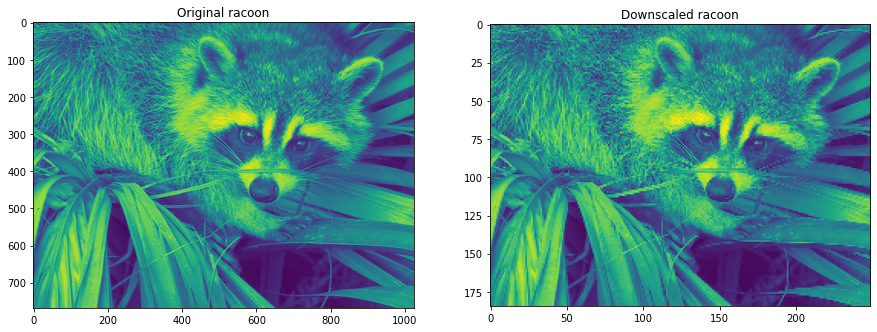

In [3]:
# plot original racoon and downscaled racoon
fig, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(racoon)
axs[0].set_title('Original racoon')
axs[1].imshow(im)
axs[1].set_title('Downscaled racoon')
plt.show()

In [4]:
# PCA based on singular value decomposition
im_centered = im - im.mean(0)

# singular value decomposition
U, sigma, V = np.linalg.svd(im_centered)
Sigma = np.diag(sigma)

# calculate energies
e_svd = sigma / sum(sigma) # is a vector

In [5]:
# calculate the critical value for 1% loss (99% preservation) due to truncation
e_crit = 0
for i in range(len(sigma)):
    e_crit += sigma[i] / sum(sigma)
    if e_crit >= 0.99:
        num_pc_crit = i+1# the +1 is needed if pcs are displayed starting from 1
        break
        
# calculate the critical value for 50% (50% preservation) loss due to truncation
e_crit = 0
for i in range(len(sigma)):
    e_crit += sigma[i] / sum(sigma)
    if e_crit >= 0.50:
        num_pc_crit_50 = i+1
        break
        
# calculate the critical value for 25% (75% preservation) loss due to truncation
e_crit = 0
for i in range(len(sigma)):
    e_crit += sigma[i] / sum(sigma)
    if e_crit >= 0.75:
        num_pc_crit_75 = i+1
        break
        
# calculate the critical value for 75% (25% preservation) loss due to truncation
e_crit = 0
for i in range(len(sigma)):
    e_crit += sigma[i] / sum(sigma)
    if e_crit >= 0.25:
        num_pc_crit_25 = i+1
        break

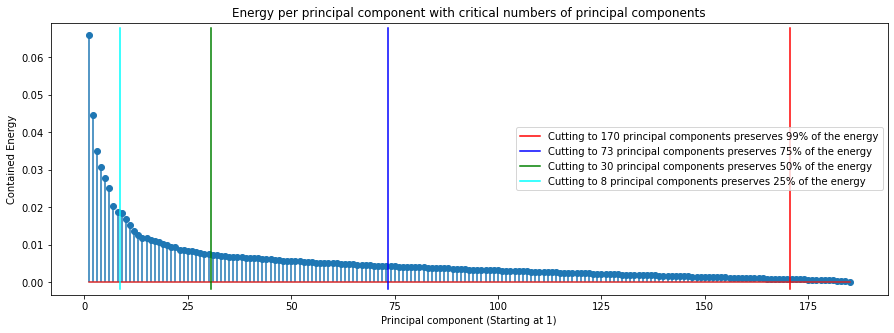

In [6]:
# plot energies
fig, ax = plt.subplots(figsize=(15,5))
y_pos = np.arange(len(e_svd))+1# the +1 allows to display pcs starting from 1

ax.stem(y_pos, e_svd, use_line_collection=True)
ax.axvline(x=num_pc_crit+0.5, ymin=0.02, ymax=0.98, color='red', label='Cutting to '+str(num_pc_crit)+' principal components preserves 99% of the energy')
ax.axvline(x=num_pc_crit_75+0.5, ymin=0.02, ymax=0.98, color='blue', label='Cutting to '+str(num_pc_crit_75)+' principal components preserves 75% of the energy')
ax.axvline(x=num_pc_crit_50+0.5, ymin=0.02, ymax=0.98, color='green', label='Cutting to '+str(num_pc_crit_50)+' principal components preserves 50% of the energy')
ax.axvline(x=num_pc_crit_25+0.5, ymin=0.02, ymax=0.98, color='cyan', label='Cutting to '+str(num_pc_crit_25)+' principal components preserves 25% of the energy')
ax.set_xlabel('Principal component (Starting at 1)')
ax.set_ylabel('Contained Energy')
ax.set_title('Energy per principal component with critical numbers of principal components')
ax.legend(loc='best')
plt.show()

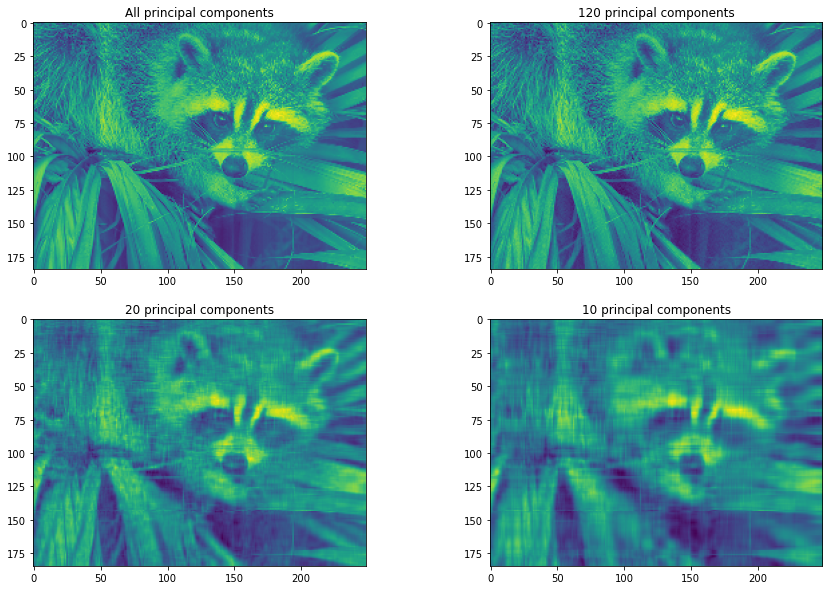

In [7]:
# Reconstruction with all, 120, 20, 10 principal components
num_pc = [len(sigma), 120, 20, 10]
fig, axs = plt.subplots(2,2,figsize=(15,10))
im_reconstructed = []
for i in num_pc:
    U_trunc = U[:,:i]
    Sigma_trunc = Sigma[:i, :i]
    V_trunc = V[:i,:]
    im_reconstructed.append(U_trunc @ Sigma_trunc @ V_trunc)

axs[0,0].imshow(im_reconstructed[0])
axs[0,0].set_title('All principal components')
axs[0,1].imshow(im_reconstructed[1])
axs[0,1].set_title('120 principal components')
axs[1,0].imshow(im_reconstructed[2])
axs[1,0].set_title('20 principal components')
axs[1,1].imshow(im_reconstructed[3])
axs[1,1].set_title('10 principal components')
plt.show()

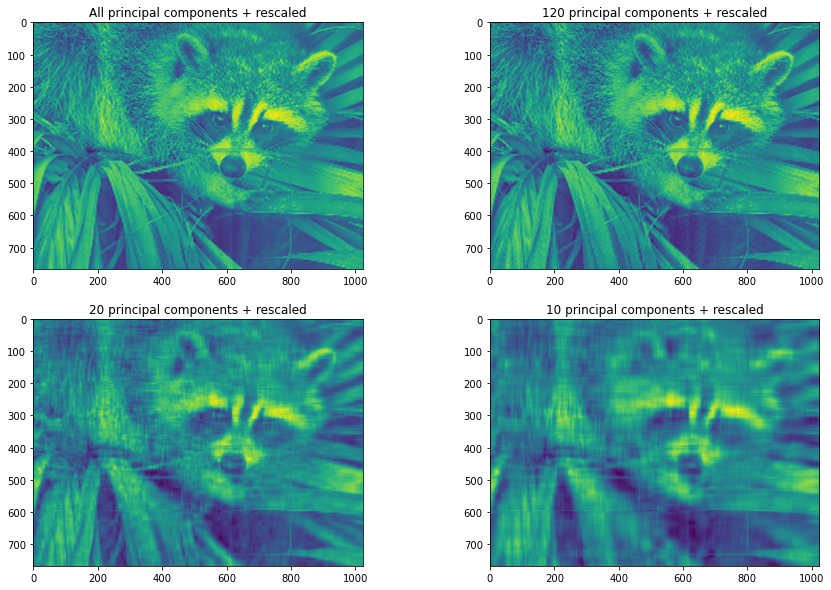

In [8]:
# rescale reconstructed images and display them - image quality doesn't change
im_rec_res = []
fig, axs = plt.subplots(2,2,figsize=(15,10))
for i in range(len(im_reconstructed)):
    im_rec_res.append(cv2.resize(im_reconstructed[i], (racoon.shape[1],racoon.shape[0]), interpolation=cv2.INTER_CUBIC))

axs[0,0].imshow(im_rec_res[0])
axs[0,0].set_title('All principal components + rescaled')
axs[0,1].imshow(im_rec_res[1])
axs[0,1].set_title('120 principal components + rescaled')
axs[1,0].imshow(im_rec_res[2])
axs[1,0].set_title('20 principal components + rescaled')
axs[1,1].imshow(im_rec_res[3])
axs[1,1].set_title('10 principal components + rescaled')
plt.show()

In [9]:
# Mean squared error between original data and reconstructed data
for i in range(len(im_reconstructed)):
    print("MSE = %.6f " %(np.mean((im_centered - im_reconstructed[i])**2)) +'for '+str(num_pc[i])+'PCs. ')

MSE = 0.000000 for 185PCs. 
MSE = 24.661565 for 120PCs. 
MSE = 463.886517 for 20PCs. 
MSE = 698.517411 for 10PCs. 
